# Extracting the data

In [1]:
#pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/7d/76/31fb9c58398f4cbdde4a0831d0407a1ca987fe828c7da9ce80969014a5a1/yfinance-0.2.40-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.1/3.0 MB 825.8 kB/s eta 0:00:04
     -- ------------------------------------- 0.2/3.0 MB 1.5 MB/s eta 0:00:02
     ----- ---------------------------------- 0.4/3.0 MB 2.4 MB

In [2]:
import yfinance as yf

# Define the ticker symbol for Larsen & Toubro Limited
ticker_symbol = "LT.NS"  # Adjust this ticker symbol if it's different for Larsen & Toubro on the Indian stock market

# Download the historical data
data = yf.download(ticker_symbol, start="2022-04-01", end="2024-03-31")

# Display the first few rows of the data
print(data.head())

# Save the data to a CSV file
data.to_csv("larsen_toubro_data.csv")


[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-04-01  1759.000000  1794.000000  1759.000000  1790.099976  1734.073242   
2022-04-04  1784.000000  1829.849976  1776.599976  1826.349976  1769.188599   
2022-04-05  1840.000000  1845.000000  1827.000000  1836.050049  1778.585205   
2022-04-06  1833.000000  1858.000000  1827.699951  1852.800049  1794.810913   
2022-04-07  1849.900024  1855.849976  1810.150024  1826.300049  1769.140259   

             Volume  
Date                 
2022-04-01  2050573  
2022-04-04  1955281  
2022-04-05  1718581  
2022-04-06  2245496  
2022-04-07  2003954  


# Clean the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [4]:
# Load the data
file_path = 'larsen_toubro_data.csv'
data = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# Display the first few rows of the data
print(data.head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-04-01  1759.000000  1794.000000  1759.000000  1790.099976  1734.073242   
2022-04-04  1784.000000  1829.849976  1776.599976  1826.349976  1769.188599   
2022-04-05  1840.000000  1845.000000  1827.000000  1836.050049  1778.585205   
2022-04-06  1833.000000  1858.000000  1827.699951  1852.800049  1794.810913   
2022-04-07  1849.900024  1855.849976  1810.150024  1826.300049  1769.140259   

             Volume  
Date                 
2022-04-01  2050573  
2022-04-04  1955281  
2022-04-05  1718581  
2022-04-06  2245496  
2022-04-07  2003954  


In [5]:
# Clean the data: Drop columns that are not needed
data = data[['Close']]

# Check for missing values
print("Missing values before interpolation:")
print(data.isnull().sum())

Missing values before interpolation:
Close    0
dtype: int64


# Interpolate missing values

In [6]:
# Interpolate missing values
data.interpolate(method='time', inplace=True)

# Check for missing values again
print("Missing values after interpolation:")
print(data.isnull().sum())

Missing values after interpolation:
Close    0
dtype: int64


# Plotting a line graph

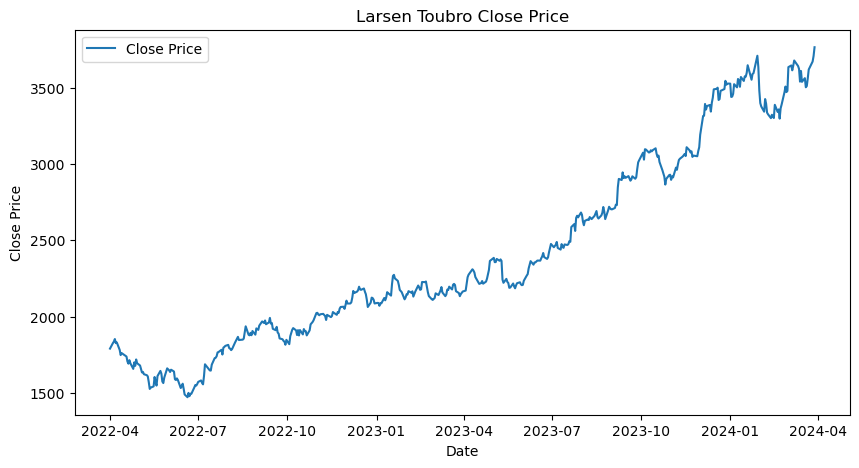

In [7]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(data, label='Close Price')
plt.title('Larsen Toubro Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Split the data into training and test sets

In [8]:
# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

In [9]:
# Display the sizes of the train and test datasets
print("Training data size:", len(train_data))
print("Test data size:", len(test_data))

# Display the first few rows of the train and test datasets
print("Training data:\n", train_data.head())
print("Test data:\n", test_data.head())

Training data size: 393
Test data size: 99
Training data:
                   Close
Date                   
2022-04-01  1790.099976
2022-04-04  1826.349976
2022-04-05  1836.050049
2022-04-06  1852.800049
2022-04-07  1826.300049
Test data:
                   Close
Date                   
2023-11-02  2918.100098
2023-11-03  2911.250000
2023-11-06  2975.449951
2023-11-07  2961.300049
2023-11-08  2996.449951


# Convert the data to monthly frequency

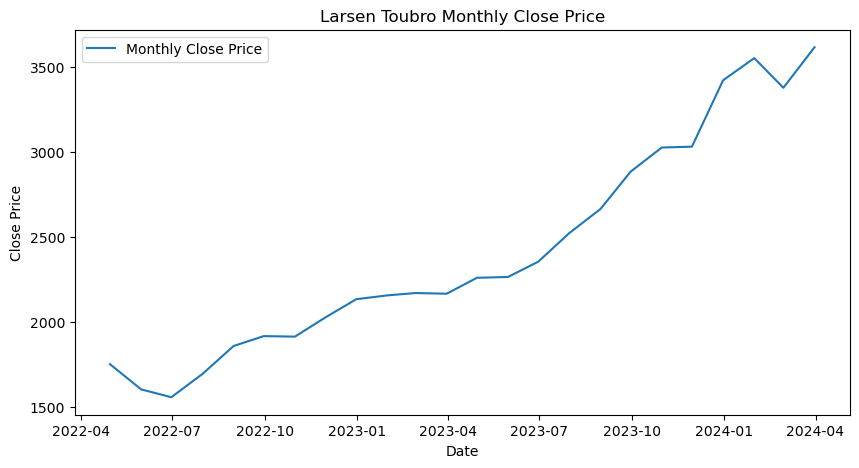

In [11]:
# Convert the data to monthly frequency
monthly_data = data.resample('M').mean()

# Plot the monthly data
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Monthly Close Price')
plt.title('Larsen Toubro Monthly Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Decompose time series into the components using additive and multiplicative models

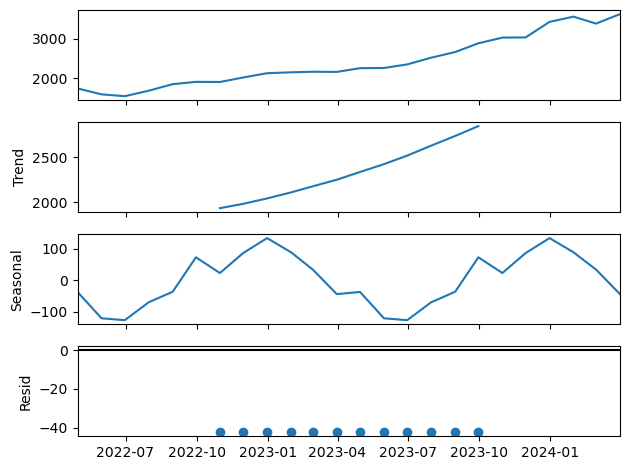

In [12]:
# Decompose the time series using additive model
additive_decompose = seasonal_decompose(monthly_data, model='additive')
additive_decompose.plot()
plt.show()

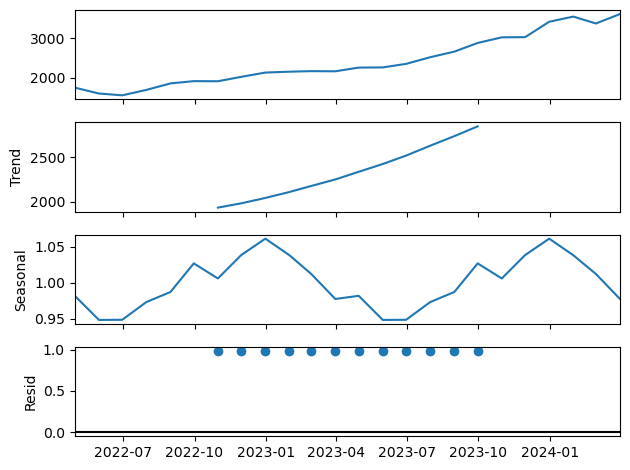

In [13]:
# Decompose the time series using multiplicative model
multiplicative_decompose = seasonal_decompose(monthly_data, model='multiplicative')
multiplicative_decompose.plot()
plt.show()

# Univariate Forecasting - Conventional Models/Statistical Models

## Holt - Winters Model

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(monthly_data, seasonal='add', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)

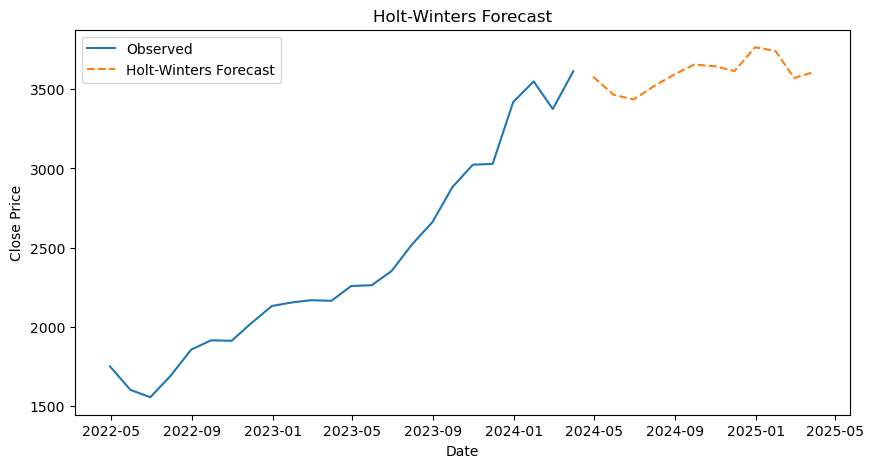

In [15]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## ARIMA Model 

**ARIMA Model - Daily Data**

In [16]:
# Interpolate missing values
data.interpolate(method='time', inplace=True)

# Convert the data to daily frequency
daily_data = data.resample('D').mean()

# Interpolate missing values in the daily data (if any)
daily_data.interpolate(method='time', inplace=True)

# Display the first few rows of the daily data
print(daily_data.head())

# Save the daily data to a new CSV file
daily_data.to_csv('daily_Larsen_Toubro_data.csv')

                  Close
Date                   
2022-04-01  1790.099976
2022-04-02  1802.183309
2022-04-03  1814.266642
2022-04-04  1826.349976
2022-04-05  1836.050049


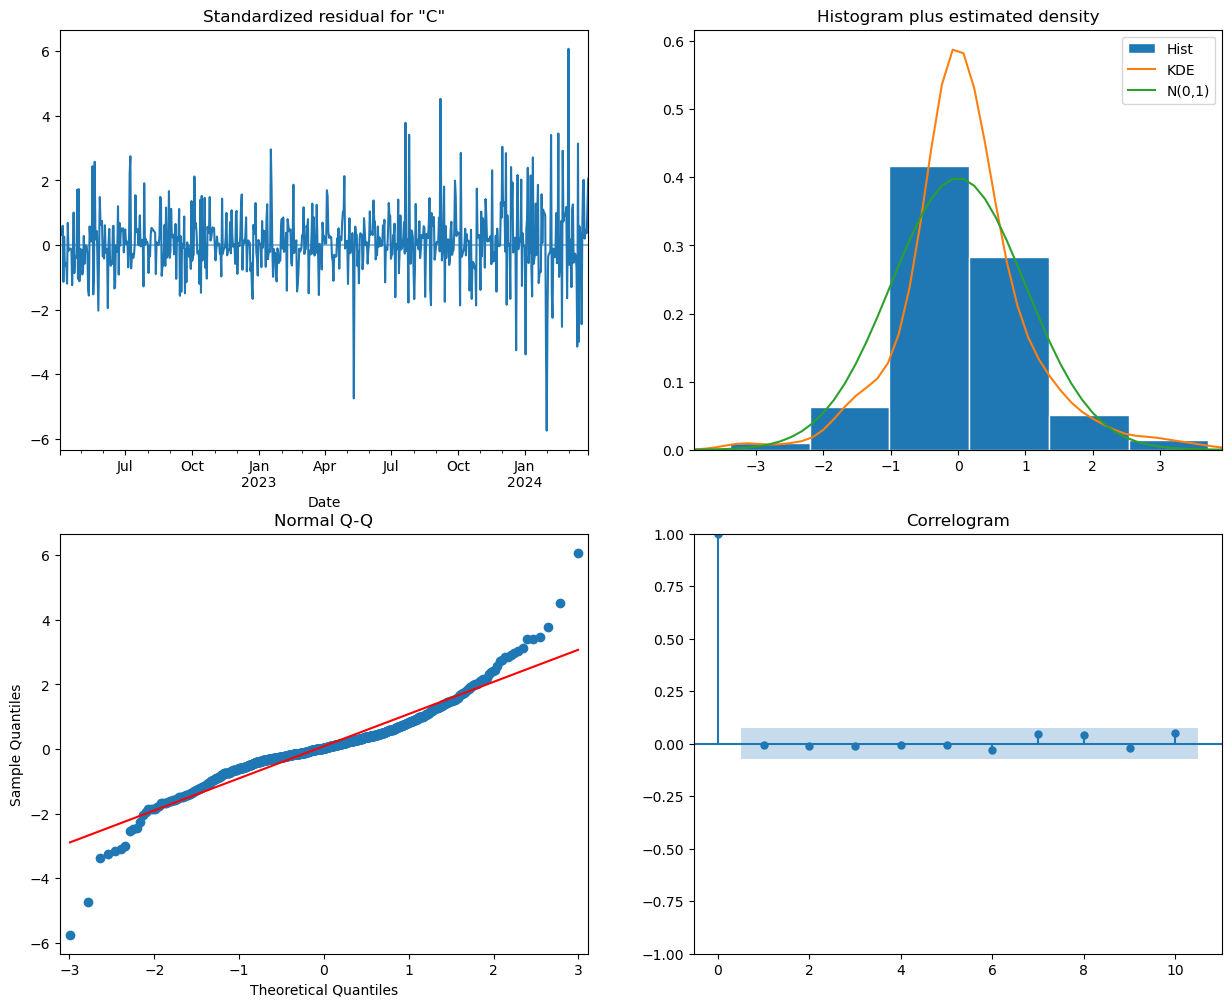

In [17]:
import statsmodels.api as sm

# Fit the ARIMA model
arima_model = sm.tsa.ARIMA(daily_data, order=(5, 1, 0)).fit()

# Diagnostic checks for ARIMA model
arima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

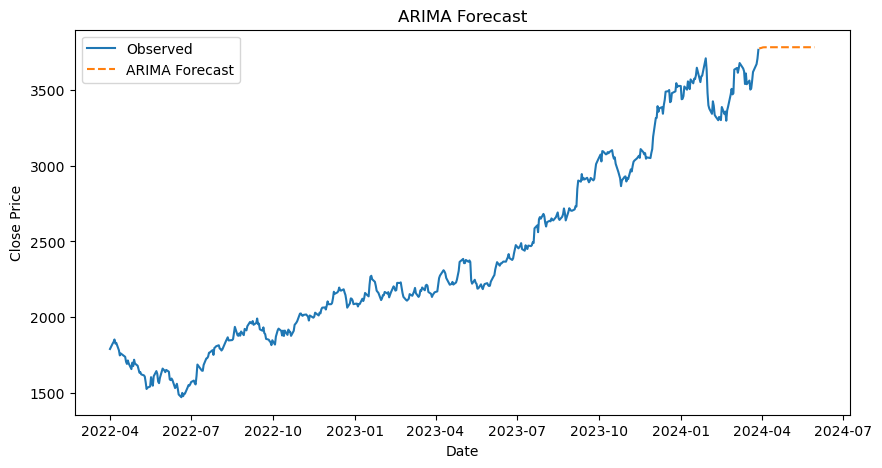

In [18]:
# Forecast for the next 3 months (assuming 21 trading days per month)
arima_forecast = arima_model.forecast(steps=63)

# Plot the ARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_data, label='Observed')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**ARIMA Model - Monthly Data**

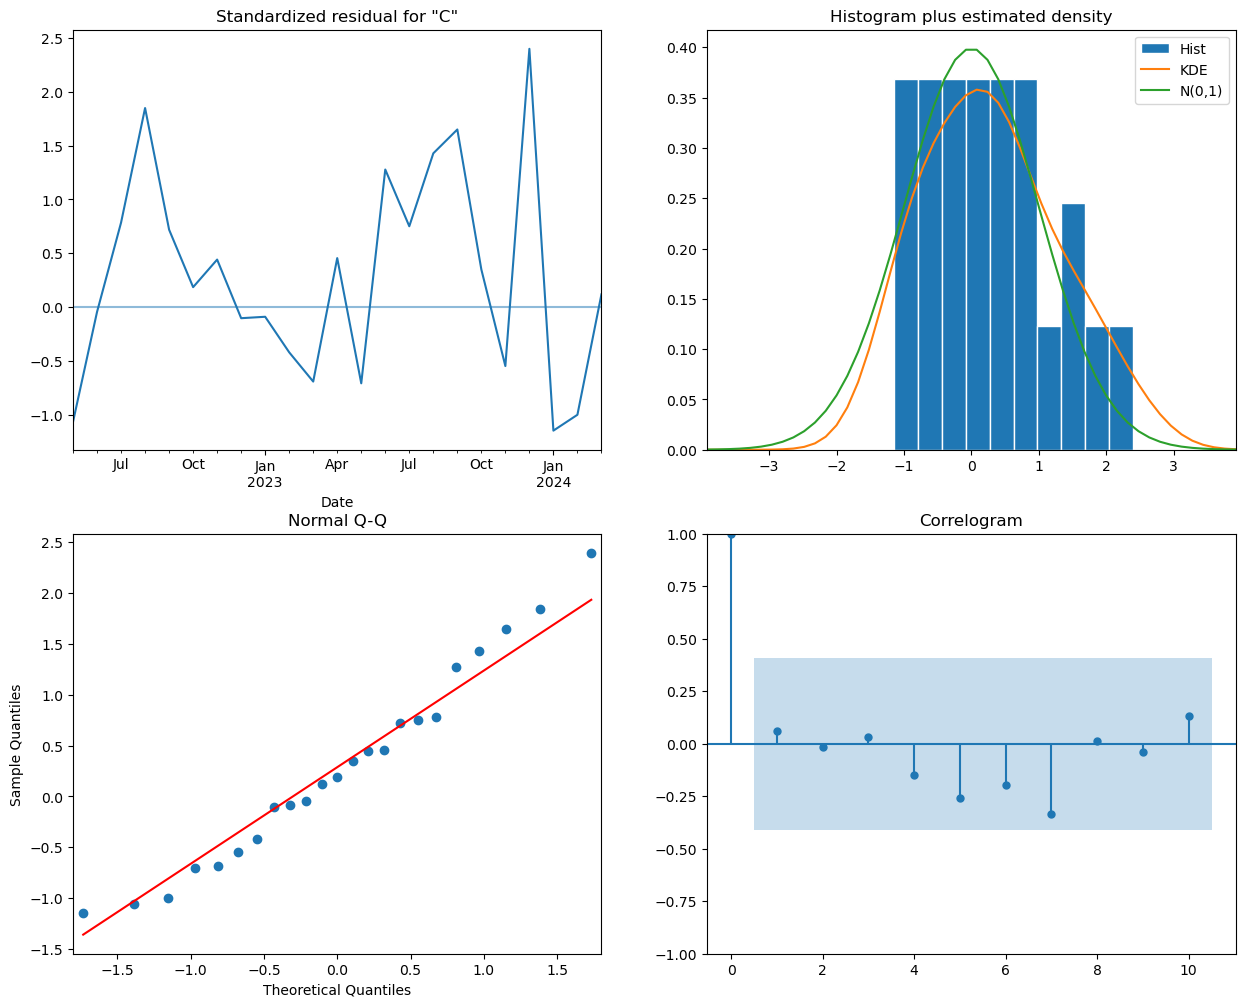

In [19]:
# Fit the ARIMA model on the monthly data
arima_model = sm.tsa.ARIMA(monthly_data, order=(5, 1, 0)).fit()

# Diagnostic checks for ARIMA model
arima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

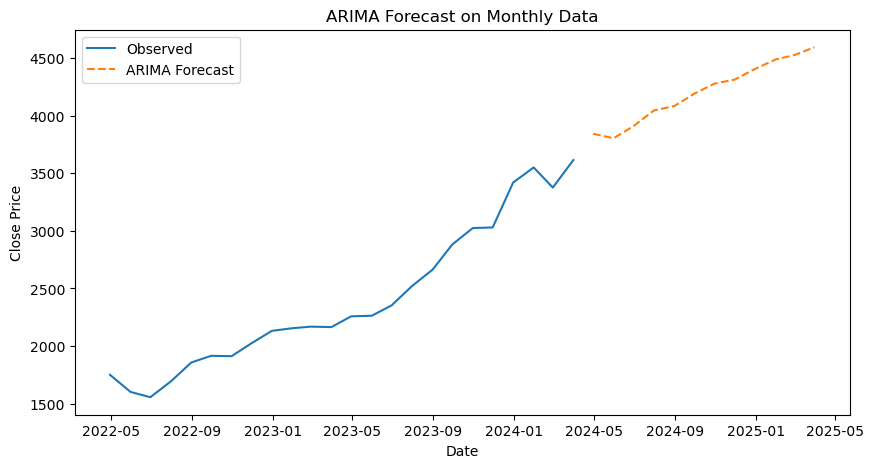

In [20]:
# Forecast for the next 12 months
arima_forecast = arima_model.forecast(steps=12)

# Plot the ARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Observed')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Forecast on Monthly Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**SARIMA Model**

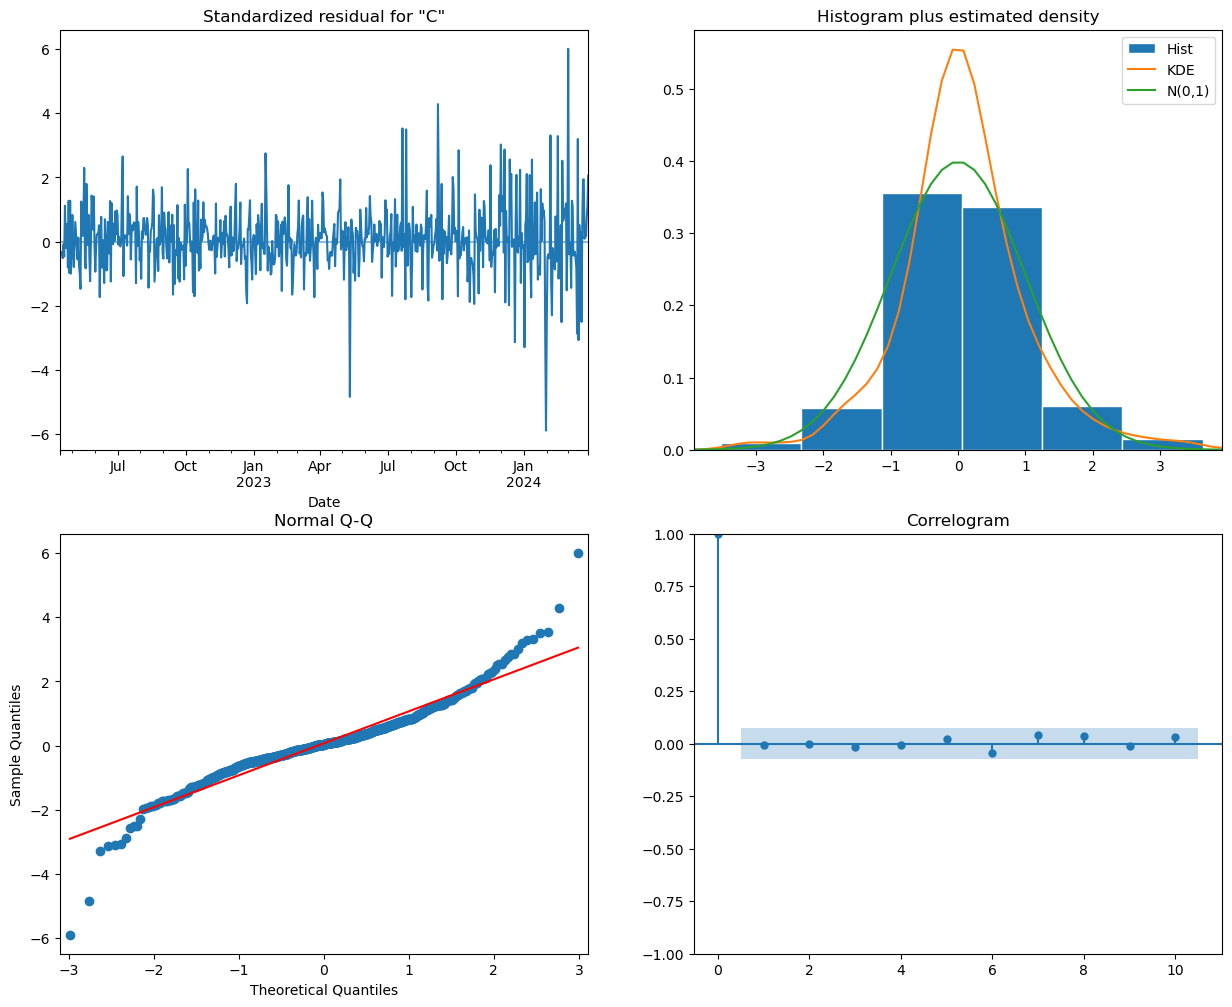

In [21]:
# Fit the SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(daily_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

# Diagnostic checks for SARIMA model
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

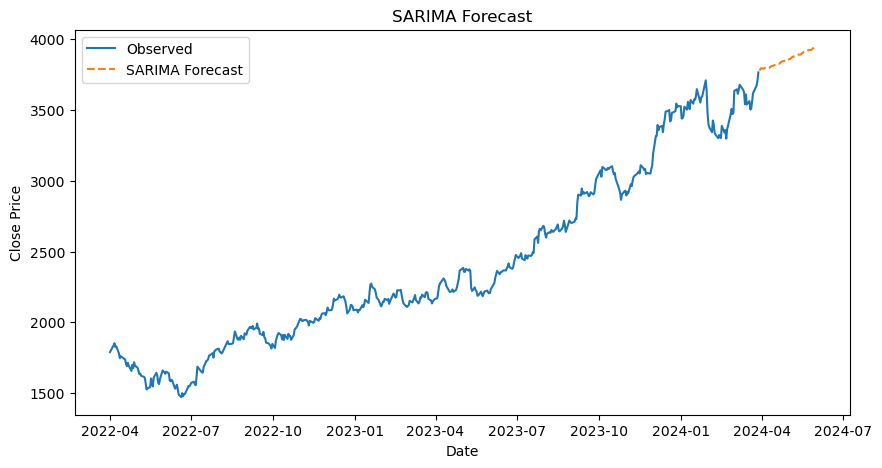

In [22]:
# Forecast for the next 3 months (assuming 21 trading days per month)
sarima_forecast = sarima_model.forecast(steps=63)

# Plot the SARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_data, label='Observed')
plt.plot(sarima_forecast, label='SARIMA Forecast', linestyle='--')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Multivariate Forecasting - Machine Learning Models

**LSTM Model**

In [23]:
#pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2d

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [25]:
# Load the data
file_path = 'larsen_toubro_data.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [26]:
# Scale the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [27]:
# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length, 3])  # Target is 'Close' price
    return np.array(sequences), np.array(labels)

# Create sequences
sequence_length = 30
X, y = create_sequences(scaled_data, sequence_length)

In [28]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\RIDDHI\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0088 - val_loss: 0.0162
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0146 - val_loss: 0.0342
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0016 - val_loss: 0.0034
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0015 - val_loss: 0.0066
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0021 - val_loss: 0.0065
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0013 - val_loss: 0.0038
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0016 - val_loss: 0.0060
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.

In [30]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 412ms/step


In [31]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 6365356.723720193, True Value: 6651314.286514022
Prediction: 6406788.040381312, True Value: 6713643.657235317
Prediction: 6456303.707060218, True Value: 6780877.434608365
Prediction: 6512592.06895709, True Value: 6724474.263501469
Prediction: 6565331.871359348, True Value: 6960917.554195208
Prediction: 6618509.450416803, True Value: 6878356.882382494
Prediction: 6670644.517975211, True Value: 6821341.034635889
Prediction: 6715106.767907262, True Value: 6851790.265353748
Prediction: 6749402.995154977, True Value: 6701994.818323298
Prediction: 6772293.577046752, True Value: 6737144.895376133


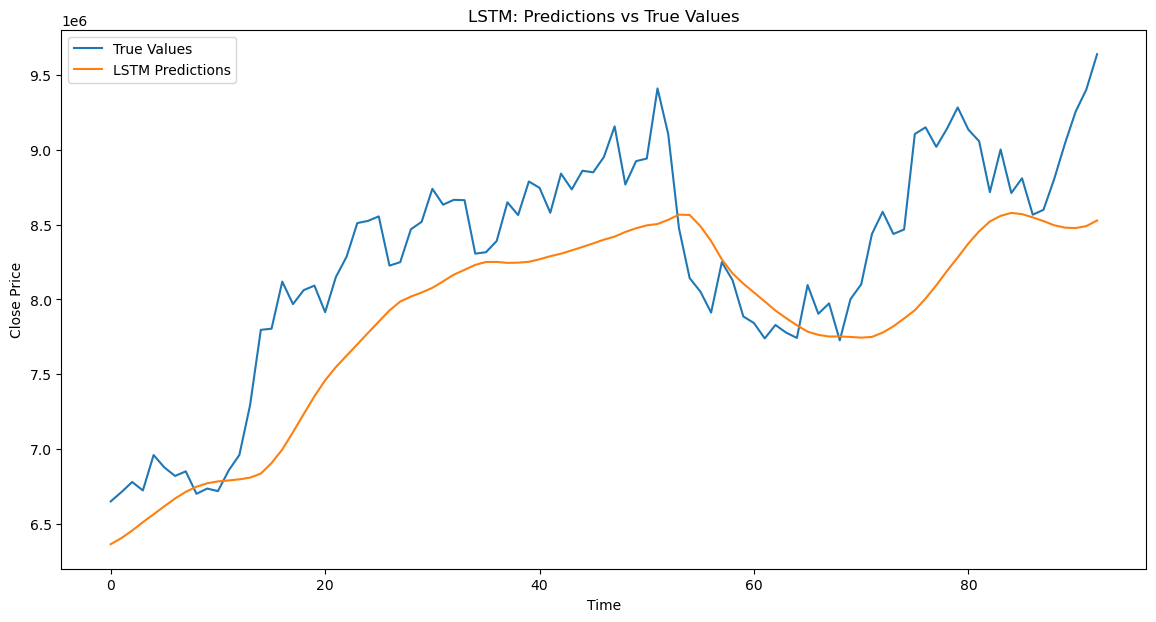

In [32]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**Tree Based Models**

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [33]:
# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length, 3])  # Target is 'Close' price
    return np.array(sequences), np.array(labels)

# Create sequences
sequence_length = 30
X, y = create_sequences(data.values, sequence_length)

# Reshape X to 2D array for tree-based models
X_reshaped = X.reshape(X.shape[0], -1)

In [34]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X_reshaped) * 0.8)
X_train, X_test = X_reshaped[:train_size], X_reshaped[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [37]:
# Train and evaluate the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Mean Squared Error: {mse_dt}")

Decision Tree Mean Squared Error: 174655.60686650648


In [38]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 175714.92813506545


In [39]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 2996.449951171875, True Value: 3033.25
Prediction: 2961.300048828125, True Value: 3048.5
Prediction: 2961.300048828125, True Value: 3064.949951171875
Prediction: 3088.699951171875, True Value: 3051.14990234375
Prediction: 3088.699951171875, True Value: 3109.0
Prediction: 3076.0, True Value: 3088.800048828125
Prediction: 3076.0, True Value: 3074.85009765625
Prediction: 3101.89990234375, True Value: 3082.300048828125
Prediction: 3101.89990234375, True Value: 3045.64990234375
Prediction: 3074.699951171875, True Value: 3054.25


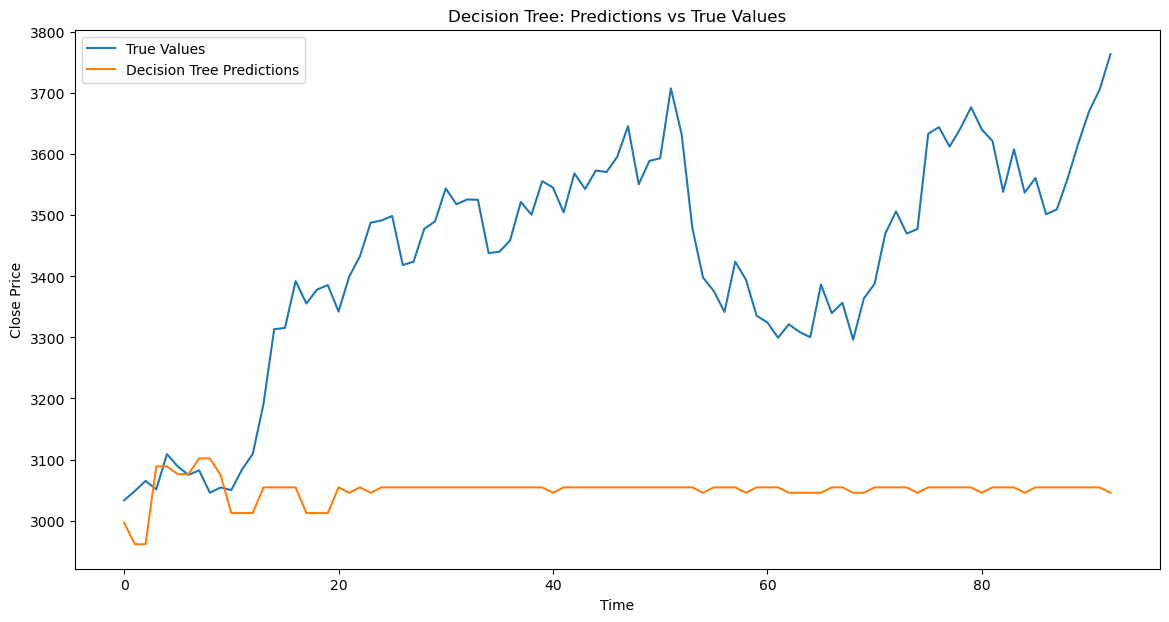

In [40]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [41]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 3039.31552734375, True Value: 3033.25
Prediction: 3044.2615258789065, True Value: 3048.5
Prediction: 3058.227521972656, True Value: 3064.949951171875
Prediction: 3059.1065234375, True Value: 3051.14990234375
Prediction: 3063.366511230469, True Value: 3109.0
Prediction: 3062.9200146484377, True Value: 3088.800048828125
Prediction: 3065.79400390625, True Value: 3074.85009765625
Prediction: 3062.178515625, True Value: 3082.300048828125
Prediction: 3066.8010107421874, True Value: 3045.64990234375
Prediction: 3061.055517578125, True Value: 3054.25


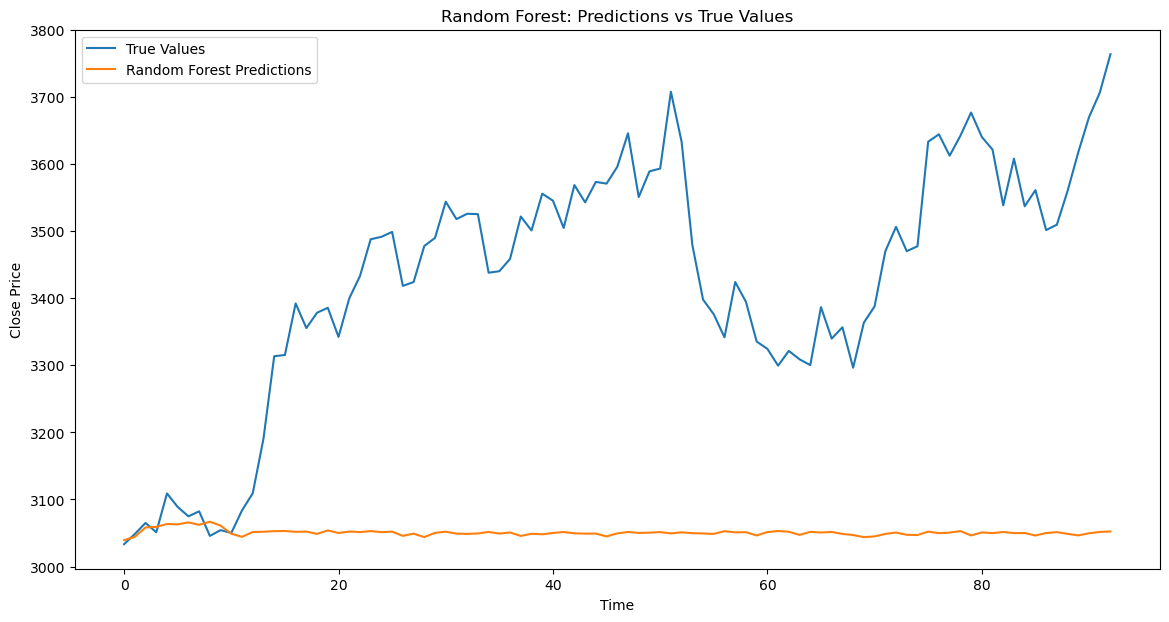

In [42]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

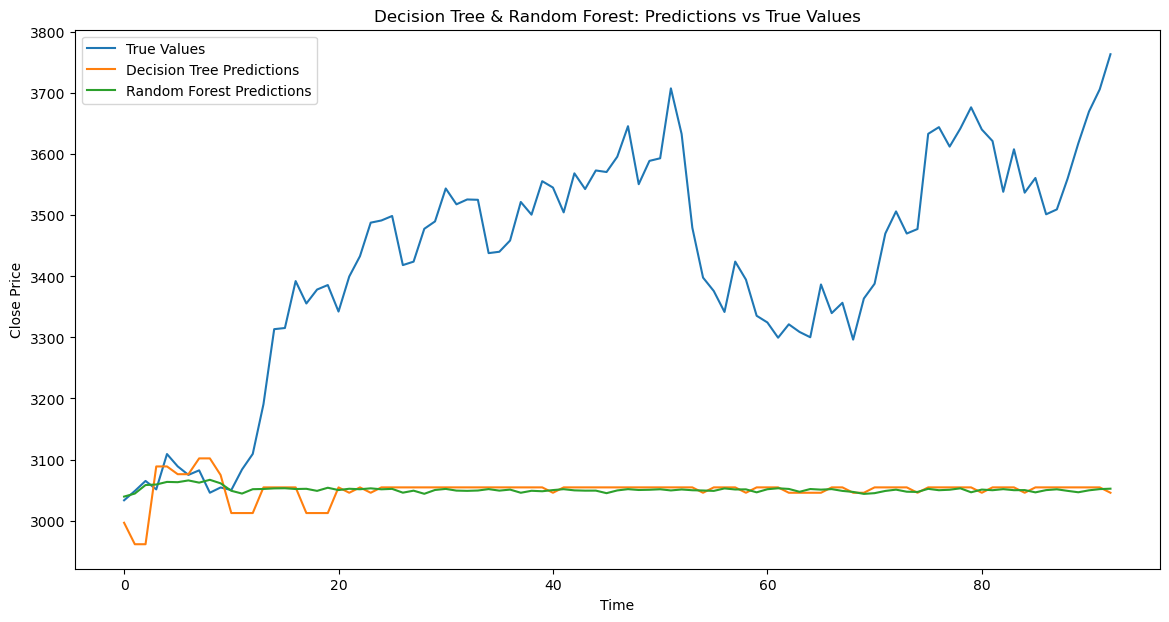

In [43]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


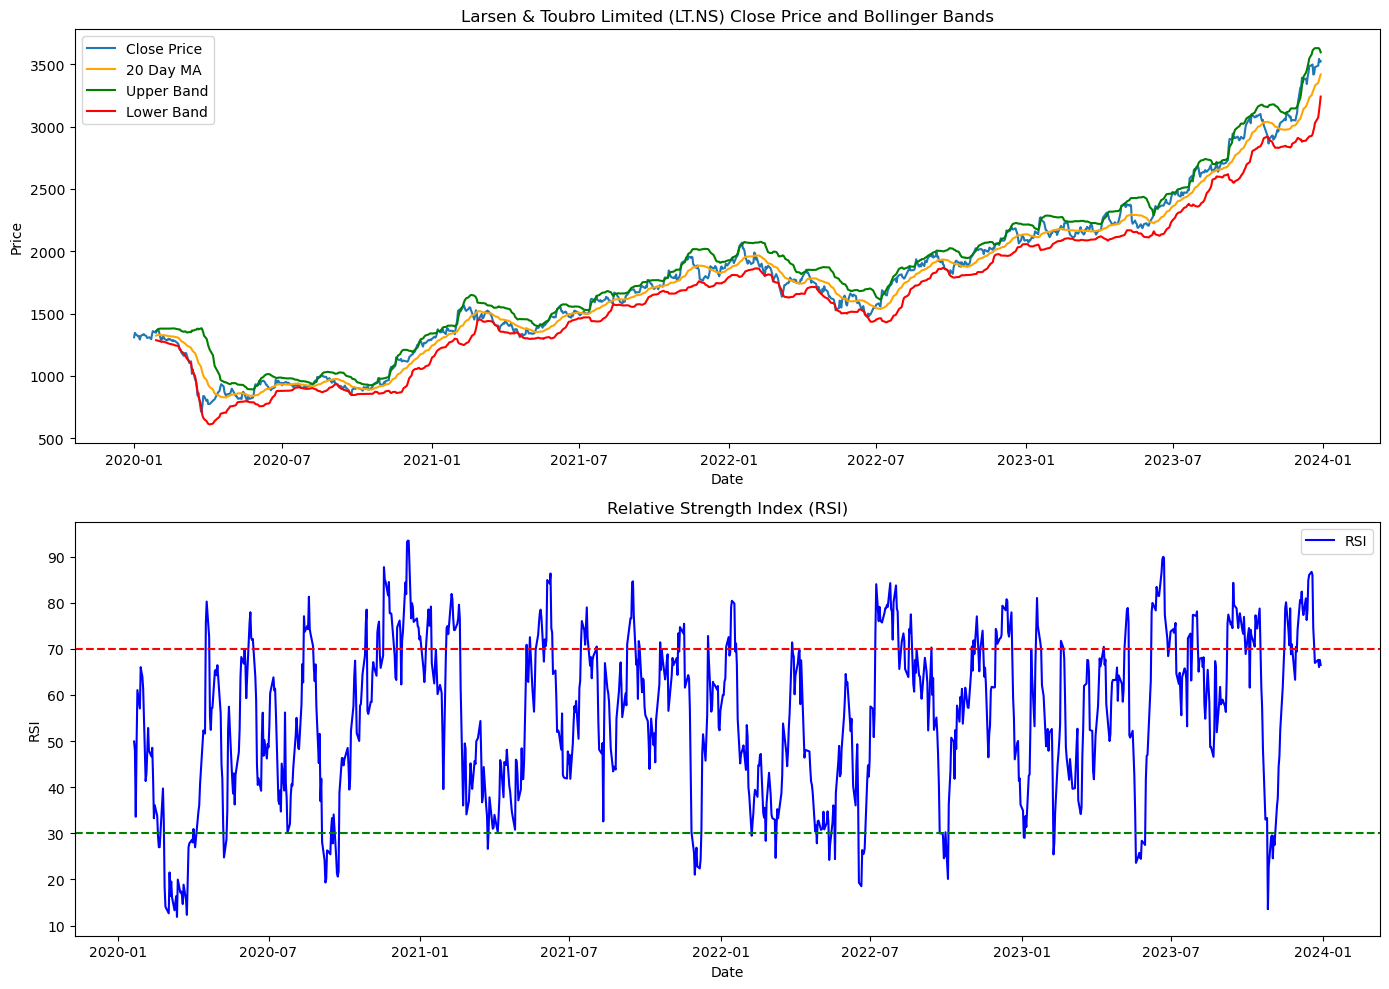

In [51]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch historical data for Larsen & Toubro Limited
ticker_symbol = "LT.NS"
data = yf.download(ticker_symbol, start="2020-01-01", end="2023-12-31")

# Calculate RSI
def calculate_rsi(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data, 14)

# Calculate Bollinger Bands
data['20 Day MA'] = data['Close'].rolling(window=20).mean()
data['20 Day STD'] = data['Close'].rolling(window=20).std()
data['Upper Band'] = data['20 Day MA'] + (data['20 Day STD'] * 2)
data['Lower Band'] = data['20 Day MA'] - (data['20 Day STD'] * 2)

# Plotting the Close price, RSI, and Bollinger Bands
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot Close price and Bollinger Bands
ax1.plot(data.index, data['Close'], label='Close Price')
ax1.plot(data.index, data['20 Day MA'], label='20 Day MA', color='orange')
ax1.plot(data.index, data['Upper Band'], label='Upper Band', color='green')
ax1.plot(data.index, data['Lower Band'], label='Lower Band', color='red')
ax1.set_title('Larsen & Toubro Limited (LT.NS) Close Price and Bollinger Bands')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend()

# Plot RSI
ax2.plot(data.index, data['RSI'], label='RSI', color='blue')
ax2.axhline(70, color='red', linestyle='--')
ax2.axhline(30, color='green', linestyle='--')
ax2.set_title('Relative Strength Index (RSI)')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.legend()

plt.tight_layout()
plt.show() 